# Project: Wrangling and Analyze Data

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 
import warnings
warnings.filterwarnings('ignore')

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Reading the json.txt file line by line
tweet_api = []

with open('tweet-json.txt') as file:
    for line in file:
        tweet_api.append(json.loads(line))

In [6]:
tweet_data = pd.DataFrame(tweet_api, columns = ['id','retweet_count','favorite_count'])

## Assessing Data

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [10]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [11]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1.Rating Denominator has values other than 10

2.There are retweets in the dataset which should not be

3.There are replies to original tweets which should not be

4.Some dog names are invalid i.e a, an, none

5.Invalid timestamp datatype (string instead of datetime)

6.Some IDs have missing photos (2075 rows instead of 2356)

7.Some words in the p1, p2 and p3 columns are separated by underscores instead of spaces

8.The p1, p2 and p3 columns have entries that start with an uppercase while others start with a lowercase.

### Tidiness issues
1. The doggo, floofer, pupper and puppo columns should be in just one column named dog stage for instance.
2. All 3 datasets should be combined to become one for proper analysis.
3.The id column in tweet_data should be tweet_id instead as in the other 2 datasets so that it will be possible to merge all 3 datasets on the twet_id column.

## Cleaning Data

In [15]:
# Make copies of original pieces of data
twitter_archive_cleaned = twitter_archive.copy()
image_pred_cleaned = image_pred.copy()
tweet_data_cleaned = tweet_data.copy()

### TIDINESS ISSUES

### Issue #1: The doggo, floofer, pupper and puppo columns should be in one column named dog breed.

#### Define: Create a new column named dog breed and extract the dog breeds from the text column, then drop the doggo, floofer, pupper and puppo columns.

#### Code

In [16]:
#Extract dog stage from text column into a new column called dog_stage
twitter_archive_cleaned['dog_stage'] = twitter_archive_cleaned['text'].str.extract('(doggo|floofer|pupper|puppo)') 

In [17]:
#Drop unwanted columns
twitter_archive_cleaned.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [18]:
twitter_archive_cleaned.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [19]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Issue #2: The id column in tweet_data_cleaned should be named tweet_id to allow for merging of the 3 datasets on that column.

### Define: Rename the id column in tweet_data_cleaned dataset; name it tweet_id.

#### Code

In [20]:
tweet_data_cleaned.rename(columns = {'id' : 'tweet_id'}, inplace=True)

#### Test

In [21]:
tweet_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #3: All datasets are related but separated into 3 dataframes

### Define: Combine all datasets into one dataset based on the tweet_id column

### Code

In [22]:
#Merging the 3 datasets
merged_data1 = pd.merge(twitter_archive_cleaned, image_pred_cleaned, on='tweet_id', how='left')
merged_data2 = pd.merge(merged_data1, tweet_data_cleaned, on='tweet_id', how='left')

### Test

In [23]:
merged_data2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


### QUALITY ISSUES

### Issue #1: Rating Denominator has values other than 10

### Define: Remove rows with rating denominator not equal to 10

### Code

In [24]:
#Retaining only rows with rating_denominator of 10
merged_data2 = merged_data2[merged_data2['rating_denominator']==10]

### Test

In [25]:
merged_data2['rating_denominator'].describe()

count    2333.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### Issue #2: There are retweets in the dataset which should not be

### Define: Delete rows that represent retweets and all associated columns

### Code

In [26]:
#We only need rows that represent original tweets only, that is where retweeted_status_id is null
merged_data2 = merged_data2[merged_data2.retweeted_status_id.isnull()]

In [27]:
#Delete all other associated columns
merged_data2.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Test

In [28]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2153 non-null   int64  
 1   in_reply_to_status_id  73 non-null     float64
 2   in_reply_to_user_id    73 non-null     float64
 3   timestamp              2153 non-null   object 
 4   source                 2153 non-null   object 
 5   text                   2153 non-null   object 
 6   expanded_urls          2099 non-null   object 
 7   rating_numerator       2153 non-null   int64  
 8   rating_denominator     2153 non-null   int64  
 9   name                   2153 non-null   object 
 10  dog_stage              357 non-null    object 
 11  jpg_url                1976 non-null   object 
 12  img_num                1976 non-null   float64
 13  p1                     1976 non-null   object 
 14  p1_conf                1976 non-null   float64
 15  p1_d

### Issue #3: There are replies to original tweets which should not be

### Define: Delete rows that contain replies and all associated columns

### Code

In [29]:
#Keep rows that represent original tweets only, that is where in_reply_to_status_id is null
merged_data2 = merged_data2[merged_data2.in_reply_to_status_id.isnull()]

In [30]:
#Delete all associated columns
merged_data2.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

### Test

In [31]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2080 non-null   int64  
 1   timestamp           2080 non-null   object 
 2   source              2080 non-null   object 
 3   text                2080 non-null   object 
 4   expanded_urls       2077 non-null   object 
 5   rating_numerator    2080 non-null   int64  
 6   rating_denominator  2080 non-null   int64  
 7   name                2080 non-null   object 
 8   dog_stage           347 non-null    object 
 9   jpg_url             1954 non-null   object 
 10  img_num             1954 non-null   float64
 11  p1                  1954 non-null   object 
 12  p1_conf             1954 non-null   float64
 13  p1_dog              1954 non-null   object 
 14  p2                  1954 non-null   object 
 15  p2_conf             1954 non-null   float64
 16  p2_dog

### Issue #4: Some dog names are invalid i.e a, an, none

### Define: Replace all invalid names with np.nan

### Code

In [32]:
#Replacing invalid name with Nan, using the numpy function np.nan, all invalid dog names will be converted to null values.
merged_data2.name.replace(['a', 'an', 'None'], value=np.nan, inplace=True)

### Test

In [33]:
#check number of null values in 'name' column after replacing invalid dog names
sum(merged_data2.name.isnull())

651

In [34]:
merged_data2.name.head(20)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5          NaN
6          Jax
7          NaN
8         Zoey
9       Cassie
10        Koda
11       Bruno
12         NaN
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
20      Gerald
Name: name, dtype: object

### Issue #5: Invalid timestamp datatype (string instead of datetime)

### Define: Change invalid datatype by converting string to datetime

### Code

In [43]:
#Converting timestamp column to datetime datatype
merged_data2.timestamp = pd.to_datetime(merged_data2.timestamp)

### Test

In [44]:
merged_data2.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [45]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                1429 non-null   object             
 8   dog_stage           347 non-null    object             
 9   jpg_url             1954 non-null   object             
 10  img_num             1954 non-null   float64            
 11  p1                  1954 non-null   object             
 12  p1_conf             1954 non-null 

### As seen above, the datatype of the timestamp column has changed from string datatype to datetime datatype

### Issue #6: Some IDs have missing photos (2075 rows instead of 2356)

### Define: Delete rows with missing photos

### Code

In [46]:
#Deleting rows with no photos, that is keeping the rows where jpg_url is not null
merged_data2 = merged_data2[merged_data2.jpg_url.notnull()]

### Test

In [47]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   int64              
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   int64              
 6   rating_denominator  1954 non-null   int64              
 7   name                1382 non-null   object             
 8   dog_stage           316 non-null    object             
 9   jpg_url             1954 non-null   object             
 10  img_num             1954 non-null   float64            
 11  p1                  1954 non-null   object             
 12  p1_conf             1954 non-null 

  ### The missing values in jpg_url must have been deleted while other cleaning actions took place.

### Issue #7: Some words in the p1, p2 and p3 columns are separated by underscores instead of spaces

### Define: Replace underscores by spaces

### Code

In [48]:
#Replacing underscores with spaces in the p1, p2 and p3 columns, this will remove the underscores and replace it with spaces.
merged_data2.p1 = merged_data2.p1.str.replace('_', ' ')
merged_data2.p2 = merged_data2.p2.str.replace('_', ' ')
merged_data2.p3 = merged_data2.p3.str.replace('_', ' ')

### Test

In [49]:
merged_data2.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [50]:
merged_data2.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [51]:
merged_data2.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

### Issue #8: The p1, p2 and p3 columns have entries that start with an uppercase while others start with a lowercase.

### Define: convert entries that start with a lowercase letter to upper case

### Code

In [52]:
#Converting all entries beginning with a lowercase letter to uppercase, the .title() method will change all entries beginning 
# with a lowercase letter to uppercase.
merged_data2.p1 = merged_data2.p1.str.title()
merged_data2.p2 = merged_data2.p2.str.title()
merged_data2.p3 = merged_data2.p3.str.title()

### Test

In [53]:
merged_data2.p1.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper Towel
4                      Basset
5    Chesapeake Bay Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish Terrier
9                    Pembroke
Name: p1, dtype: object

In [54]:
merged_data2.p2.head(10)

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
5         Irish Terrier
6         Border Collie
7            Eskimo Dog
8          Irish Setter
9              Cardigan
Name: p2, dtype: object

In [55]:
merged_data2.p3.head(10)

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
5                Indian Elephant
6                      Ice Lolly
7                       Pembroke
8       Chesapeake Bay Retriever
9                      Chihuahua
Name: p3, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
merged_data2.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

### Visualization

Text(0.5, 1.0, 'Rating_Numerator_Distribution')

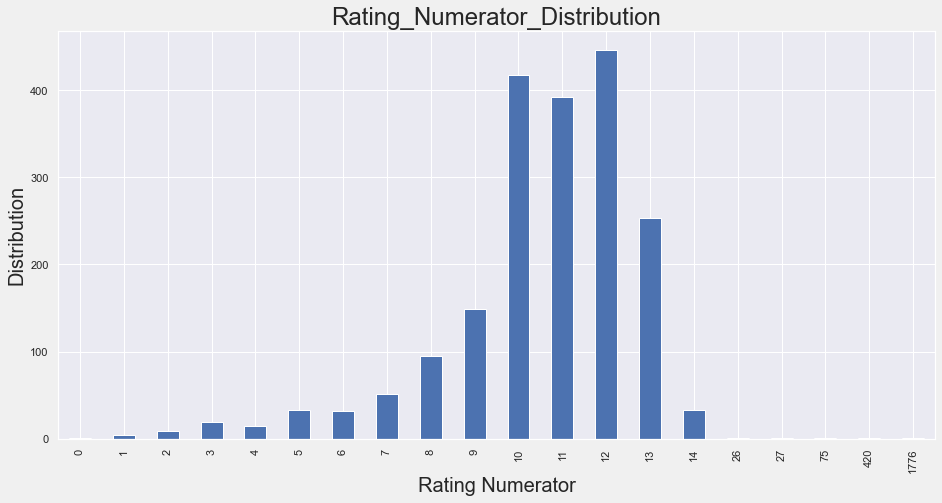

In [57]:
plt.figure(figsize=(14,7))
sns.set(style = 'darkgrid')
rating_numerator = merged_data2.groupby('rating_numerator')['rating_numerator'].count()
rating_numerator.plot.bar(x='rating_numerator', y='distribution')
plt.xlabel('Rating Numerator', size = 20)
plt.ylabel('Distribution', size = 20)
plt.title('Rating_Numerator_Distribution', size=24)

### Insights:
1. Most of the dogs in the dataset have a rating of 12/10.

2. 417 dogs in the dataset have a rating of 10/10.

3. Just one dog has a rating of 0/10.